In [1]:
import numpy as np
import pandas as pd
import csv
from csv import reader

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/topic modelling dataset/blog2.csv")
data.head()

,processed_text
0,place ocean avenu talk felt right sleep stay n...
1,nbsp damn price differ place huge drink starbu...
2,nbsp nbsp nbsp peopl school special class appe...
3,nbsp chang templat like didnt suit properli ur...
4,nbsp gonna experi blogsot stuff entri align leav


In [4]:
import sys
csv.field_size_limit(sys.maxsize)

texts=[]
with open ("/content/drive/My Drive/topic modelling dataset/blog1.csv",'r') as read_obj:
  csv_reader=reader(read_obj)
  for row in csv_reader:
    texts.append(row)
print(len(texts))

170322


In [5]:
import nltk
nltk.download("punkt")
nltk.download("popular")
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    | 

In [6]:
#Tokenization (final step in our cleaning of data) is performed using Regular Expression Tokeinzer from nltk package. 
tokenizer = RegexpTokenizer(r'\w+') #matches all word characters until a non word character like " " is found.
text=[]
for i in texts:
  #tokenize the document string
  tokens=tokenizer.tokenize(str(i))
  text.append(tokens)

In [7]:
#creating bag of words parameter
import gensim
from gensim import corpora,models

#Dictionary() function creates a term dictionary of our corpus, where every unique term is assigned an index and word count is also maintained.
dictionary = corpora.Dictionary(text)

# print(dictionary.token2id) can be used to see each unique id assigned to each unique word.

#Converts list of documents (corpus) into bag of words using dictionary prepared above. Output is a list of list of tuples with first tern the unique id and the second term the frequency.
doc_term_matrix = [dictionary.doc2bow(abst, allow_update=True) for abst in text]


**Number of topics=8**



In [8]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=8, id2word=dictionary, passes=1, workers=3)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.007*"peopl" + 0.006*"say" + 0.006*"urllink" + 0.005*"bush" + 0.005*"time" + 0.005*"year" + 0.004*"think" + 0.004*"american" + 0.004*"state" + 0.004*"like"
Topic: 1 
Words: 0.070*"urllink" + 0.008*"post" + 0.008*"like" + 0.007*"blog" + 0.007*"love" + 0.007*"think" + 0.006*"know" + 0.006*"time" + 0.005*"thing" + 0.005*"look"
Topic: 2 
Words: 0.006*"lang" + 0.004*"like" + 0.004*"pero" + 0.004*"naman" + 0.003*"hindi" + 0.003*"hehe" + 0.003*"kung" + 0.003*"para" + 0.003*"yung" + 0.002*"roseped"
Topic: 3 
Words: 0.065*"nbsp" + 0.019*"know" + 0.015*"love" + 0.014*"want" + 0.013*"think" + 0.012*"life" + 0.012*"like" + 0.012*"thing" + 0.010*"feel" + 0.010*"time"
Topic: 4 
Words: 0.010*"like" + 0.009*"go" + 0.008*"time" + 0.007*"think" + 0.007*"know" + 0.006*"thing" + 0.006*"come" + 0.006*"look" + 0.006*"want" + 0.005*"peopl"
Topic: 5 
Words: 0.021*"go" + 0.018*"like" + 0.012*"work" + 0.012*"think" + 0.011*"time" + 0.010*"know" + 0.009*"good" + 0.008*"today" + 0.007*"come" + 0

**Number of Topics=13**

In [9]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=13, id2word=dictionary, passes=1, workers=3)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.020*"go" + 0.015*"like" + 0.011*"night" + 0.010*"good" + 0.009*"time" + 0.009*"think" + 0.009*"today" + 0.008*"know" + 0.007*"come" + 0.007*"look"
Topic: 1 
Words: 0.010*"peopl" + 0.008*"say" + 0.008*"bush" + 0.006*"think" + 0.006*"american" + 0.005*"state" + 0.005*"like" + 0.005*"year" + 0.005*"presid" + 0.005*"know"
Topic: 2 
Words: 0.061*"urllink" + 0.015*"like" + 0.013*"song" + 0.010*"music" + 0.008*"band" + 0.008*"think" + 0.006*"go" + 0.006*"play" + 0.006*"time" + 0.006*"love"
Topic: 3 
Words: 0.017*"movi" + 0.014*"love" + 0.009*"time" + 0.008*"go" + 0.007*"watch" + 0.007*"good" + 0.007*"year" + 0.007*"night" + 0.006*"film" + 0.006*"like"
Topic: 4 
Words: 0.025*"go" + 0.011*"like" + 0.010*"jumper" + 0.008*"home" + 0.008*"come" + 0.007*"time" + 0.007*"today" + 0.006*"haha" + 0.006*"think" + 0.006*"leav"
Topic: 5 
Words: 0.008*"life" + 0.008*"time" + 0.007*"peopl" + 0.006*"think" + 0.006*"like" + 0.006*"love" + 0.006*"know" + 0.006*"live" + 0.006*"need" + 0.005*"

**Number of Topics=18**

In [10]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=18, id2word=dictionary, passes=1, workers=3)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"life" + 0.008*"love" + 0.007*"like" + 0.007*"know" + 0.007*"time" + 0.006*"eye" + 0.006*"live" + 0.006*"feel" + 0.006*"heart" + 0.006*"come"
Topic: 1 
Words: 0.017*"go" + 0.012*"movi" + 0.012*"like" + 0.011*"come" + 0.010*"song" + 0.008*"good" + 0.007*"music" + 0.007*"watch" + 0.006*"think" + 0.006*"time"
Topic: 2 
Words: 0.017*"work" + 0.014*"go" + 0.009*"come" + 0.007*"leav" + 0.007*"drive" + 0.007*"week" + 0.006*"thing" + 0.006*"start" + 0.006*"know" + 0.006*"today"
Topic: 3 
Words: 0.008*"naman" + 0.008*"pero" + 0.008*"hindi" + 0.007*"kung" + 0.006*"yung" + 0.006*"para" + 0.004*"wala" + 0.004*"nung" + 0.004*"niya" + 0.004*"siya"
Topic: 4 
Words: 0.020*"fuck" + 0.010*"like" + 0.008*"peopl" + 0.007*"game" + 0.007*"play" + 0.005*"know" + 0.005*"go" + 0.005*"time" + 0.005*"think" + 0.004*"team"
Topic: 5 
Words: 0.011*"haha" + 0.011*"go" + 0.007*"miss" + 0.006*"time" + 0.006*"like" + 0.006*"nan" + 0.006*"home" + 0.005*"today" + 0.005*"thing" + 0.004*"know"
Topic:

**Number of Topics=23**

In [11]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=23, id2word=dictionary, passes=1, workers=3)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.018*"say" + 0.010*"fuck" + 0.009*"like" + 0.007*"think" + 0.007*"urllink" + 0.006*"time" + 0.006*"know" + 0.004*"look" + 0.004*"good" + 0.004*"women"
Topic: 1 
Words: 0.016*"game" + 0.015*"team" + 0.010*"go" + 0.009*"home" + 0.008*"play" + 0.007*"good" + 0.007*"work" + 0.007*"time" + 0.006*"come" + 0.006*"year"
Topic: 2 
Words: 0.035*"like" + 0.016*"know" + 0.016*"think" + 0.013*"talk" + 0.011*"say" + 0.009*"tell" + 0.009*"want" + 0.008*"fuck" + 0.008*"dont" + 0.008*"go"
Topic: 3 
Words: 0.022*"blog" + 0.012*"like" + 0.010*"post" + 0.009*"write" + 0.008*"time" + 0.008*"read" + 0.008*"urllink" + 0.007*"year" + 0.007*"work" + 0.007*"think"
Topic: 4 
Words: 0.024*"game" + 0.017*"like" + 0.012*"play" + 0.011*"think" + 0.008*"want" + 0.007*"adrian" + 0.006*"john" + 0.006*"miss" + 0.005*"go" + 0.005*"feel"
Topic: 5 
Words: 0.022*"jumper" + 0.013*"go" + 0.010*"like" + 0.009*"walk" + 0.008*"come" + 0.007*"night" + 0.007*"time" + 0.007*"look" + 0.007*"good" + 0.007*"play"
Top

**Number of Topics=15**

In [12]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=15, id2word=dictionary, passes=1, workers=3)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.019*"jumper" + 0.012*"say" + 0.008*"time" + 0.007*"know" + 0.007*"peopl" + 0.006*"like" + 0.005*"go" + 0.005*"come" + 0.005*"thing" + 0.005*"good"
Topic: 1 
Words: 0.026*"game" + 0.018*"love" + 0.014*"play" + 0.008*"team" + 0.008*"time" + 0.006*"good" + 0.005*"like" + 0.005*"player" + 0.005*"think" + 0.005*"come"
Topic: 2 
Words: 0.009*"good" + 0.009*"urllink" + 0.009*"pictur" + 0.008*"think" + 0.008*"like" + 0.007*"go" + 0.006*"yeah" + 0.005*"blog" + 0.005*"post" + 0.005*"time"
Topic: 3 
Words: 0.021*"go" + 0.015*"haha" + 0.012*"today" + 0.010*"like" + 0.009*"time" + 0.008*"home" + 0.007*"bore" + 0.007*"come" + 0.006*"school" + 0.005*"gonna"
Topic: 4 
Words: 0.015*"book" + 0.015*"go" + 0.014*"read" + 0.012*"think" + 0.010*"like" + 0.009*"time" + 0.008*"write" + 0.008*"good" + 0.008*"class" + 0.008*"school"
Topic: 5 
Words: 0.009*"like" + 0.008*"know" + 0.008*"time" + 0.007*"think" + 0.007*"come" + 0.006*"love" + 0.006*"life" + 0.006*"look" + 0.005*"feel" + 0.004*"ha

In [18]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 8.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=606803ce7e6fc2c4d85f89ad3d6d0ce61d1337ac1bb1f74a329d68cdc8bac0c5
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


**Visualisation for k=15** 

In [20]:
import pyLDAvis
import pyLDAvis.gensim 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.062878 -0.079150       1        1  24.482189
14    -0.076081  0.184465       2        1  12.073753
7     -0.027490 -0.039495       3        1  10.962898
5     -0.060913 -0.001793       4        1  10.957902
13    -0.062485  0.036998       5        1   7.523428
4     -0.041727 -0.030345       6        1   6.491289
3      0.011437 -0.163104       7        1   4.772605
9     -0.017897  0.030153       8        1   4.480411
1     -0.026083  0.014418       9        1   3.945030
0     -0.021644  0.011434      10        1   3.248112
10     0.037374  0.098584      11        1   2.925572
12    -0.011571  0.016400      12        1   2.871750
2      0.023320 -0.074152      13        1   2.098426
8      0.000236 -0.034672      14        1   1.891912
6      0.336404  0.030259      15        1   1.274723, topic_info=         Term           Freq          Total Category  logprob  loglift
2780     nbsp   97168.000000   97168.000000  Default  30.0000  30.0000
18    urllink   89178.000000   89178.000000  Default  29.0000  29.0000
383        go  121158.000000  121158.000000  Default  28.0000  28.0000
371      game   17595.000000   17595.000000  Default  27.0000  27.0000
1387     blog   26099.000000   26099.000000  Default  26.0000  26.0000
...       ...            ...            ...      ...      ...      ...
518     level     341.108993    4887.452035  Topic15  -6.1504   1.7002
18    urllink     454.027595   89178.478390  Topic15  -5.8645  -0.9178
434      http     334.200007    4793.777611  Topic15  -6.1709   1.6991
524      like     386.591408  142779.628146  Topic15  -6.0253  -1.5492
916      time     280.443216  103138.467854  Topic15  -6.3463  -1.5450

[1416 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
31272      5  0.971078      abcd
11801      1  0.081969      abit
11801      3  0.002927      abit
11801      4  0.005855      abit
11801      6  0.014637      abit
...      ...       ...       ...
27107     11  0.982112  zatoichi
72631      7  0.973337      zeke
16943      2  0.985755       zeu
17004      3  0.049590     zippi
17004     10  0.925688     zippi

[8101 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 15, 8, 6, 14, 5, 4, 10, 2, 1, 11, 13, 3, 9, 7])

**Visualisation for k=23**

In [21]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=23, id2word=dictionary, passes=1, workers=3)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic: 0 
Words: 0.005*"like" + 0.004*"monkey" + 0.003*"good" + 0.003*"read" + 0.003*"time" + 0.003*"french" + 0.003*"thing" + 0.003*"know" + 0.003*"book" + 0.002*"come"
Topic: 1 
Words: 0.027*"love" + 0.022*"know" + 0.015*"like" + 0.014*"think" + 0.013*"feel" + 0.011*"want" + 0.011*"thing" + 0.010*"time" + 0.009*"life" + 0.007*"peopl"
Topic: 2 
Words: 0.016*"friend" + 0.016*"school" + 0.013*"know" + 0.012*"like" + 0.011*"time" + 0.011*"year" + 0.009*"go" + 0.008*"good" + 0.008*"want" + 0.007*"thing"
Topic: 3 
Words: 0.006*"state" + 0.005*"time" + 0.004*"think" + 0.004*"come" + 0.004*"like" + 0.004*"week" + 0.004*"go" + 0.004*"right" + 0.004*"group" + 0.003*"nation"
Topic: 4 
Words: 0.015*"time" + 0.015*"life" + 0.014*"work" + 0.012*"thing" + 0.012*"think" + 0.010*"feel" + 0.009*"like" + 0.009*"year" + 0.009*"want" + 0.008*"know"
Topic: 5 
Words: 0.013*"haha" + 0.008*"like" + 0.007*"chicken" + 0.007*"chees" + 0.006*"food" + 0.005*"go" + 0.005*"coffe" + 0.005*"urllink" + 0.004*"know" + 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18    -0.073581  0.146126       1        1  12.843243
1     -0.071304  0.042610       2        1  11.001010
19    -0.071022  0.084413       3        1   9.429050
8     -0.063543 -0.003756       4        1   8.978411
9     -0.055925  0.070856       5        1   8.659824
4     -0.076276  0.000961       6        1   7.335169
22    -0.041957 -0.170937       7        1   7.154194
2     -0.044941  0.057045       8        1   4.318956
7     -0.025261 -0.148605       9        1   3.787427
17    -0.044531  0.041450      10        1   3.328675
6     -0.042975  0.040841      11        1   3.205037
12    -0.032638 -0.113843      12        1   2.906668
11     0.025795 -0.203798      13        1   2.588066
10     0.001707  0.082510      14        1   2.299686
16    -0.005648 -0.018068      15        1   2.118023
13     0.011500  0.027892      16        1   1.665512
5      0.034197  0.094591      17        1   1.637876
15     0.012375 -0.023960      18        1   1.526482
3     -0.005977 -0.135747      19        1   1.359036
21    -0.002324  0.078993      20        1   1.132835
20     0.408734  0.037797      21        1   1.076683
0      0.085007 -0.032445      22        1   0.858364
14     0.078591  0.045072      23        1   0.789773, topic_info=         Term          Freq         Total Category  logprob  loglift
2780     nbsp  99236.000000  99236.000000  Default  30.0000  30.0000
18    urllink  90537.000000  90537.000000  Default  29.0000  29.0000
371      game  17607.000000  17607.000000  Default  28.0000  28.0000
1458     love  60768.000000  60768.000000  Default  27.0000  27.0000
3818     fuck  17415.000000  17415.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
910     thank    198.898632  15819.246261  Topic23  -6.2111   0.4650
522      life    201.586286  41481.195479  Topic23  -6.1977  -0.4856
1387     blog    193.426645  24469.156752  Topic23  -6.2390   0.0009
772    school    193.141421  29373.747096  Topic23  -6.2405  -0.1833
386      good    196.287513  65918.922800  Topic23  -6.2243  -0.9754

[2150 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
7422      16  0.945184    aaahhh
7422      21  0.036353    aaahhh
24663      7  0.119164    abbott
24663     22  0.866646    abbott
31272      2  0.976204      abcd
...      ...       ...       ...
7980       6  0.025167      zest
7980      22  0.931167      zest
17004     15  0.981772     zippi
19681      5  0.961732  zucchini
19681     10  0.013938  zucchini

[16049 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 2, 20, 9, 10, 5, 23, 3, 8, 18, 7, 13, 12, 11, 17, 14, 6, 16, 4, 22, 21, 1, 15])

**Coherence Value Graph**

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

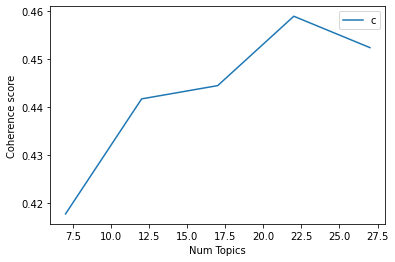

In [22]:
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=1, workers=2)
        #model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=text, start=7, limit=30, step=5)
# Show graph
import matplotlib.pyplot as plt
limit=30; start=7; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [23]:
for m,cv in zip(x,coherence_values):
  print("Number of Topics "+str(m)+"has coherence value "+str(round(cv,6)))

Number of Topics 7has coherence value 0.417767
Number of Topics 12has coherence value 0.441731
Number of Topics 17has coherence value 0.444497
Number of Topics 22has coherence value 0.458948
Number of Topics 27has coherence value 0.452409


In [24]:
#This is done to check whether the topics provided by our LDA Model have any relation with the most frequent words in the corpus.
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

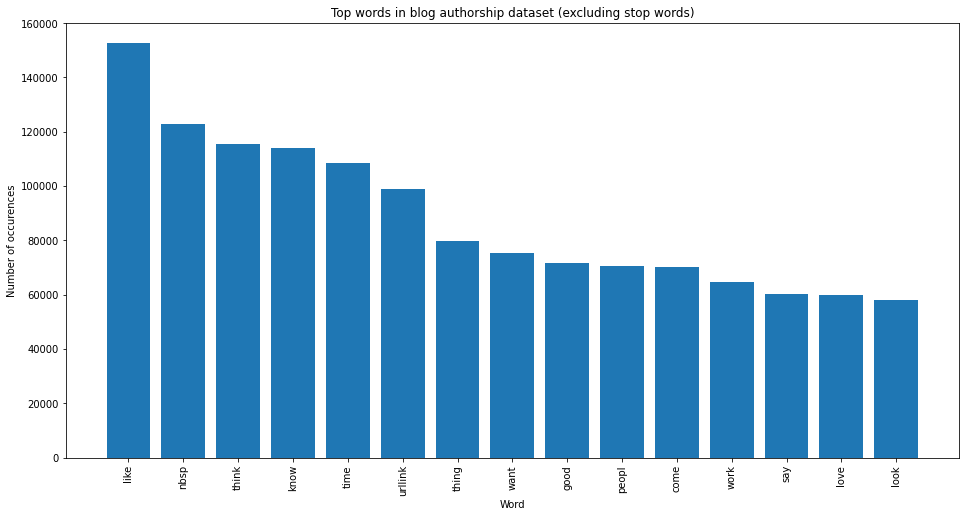

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
t = data['processed_text'].astype(str)
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=t)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in blog authorship dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()